In [3]:
ls

 Volume in drive C is OS
 Volume Serial Number is AECD-154A

 Directory of C:\Users\Bhakti\Untitled Folder 1

28-11-2020  09:30    <DIR>          .
28-11-2020  09:30    <DIR>          ..
20-08-2020  11:59    <DIR>          .ipynb_checkpoints
20-08-2020  11:51            73,465 anand-vihar, delhi-air-quality.csv
28-11-2020  09:30            43,818 LitSur.ipynb
19-08-2020  23:17                 0 untitled.txt
               3 File(s)        117,283 bytes
               3 Dir(s)  20,787,556,352 bytes free


In [1]:
import os
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
from time import time
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score , classification_report, mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import *
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d1= pd.read_csv("./anand-vihar, delhi-air-quality.csv")
d1 = d1.sort_values(by="date")
d1.columns

d1= d1.rename(columns = {" pm25": "pm25", 
                         " pm10":"pm10", 
                         " o3": "o3",
                         ' no2' : 'no2',
                         ' so2' : 'so2',
                         ' co' : 'co'})

d1.columns
features=list(d1.columns)

In [3]:
d1.head()

,date,pm25,pm10,o3,no2,so2,co
2142,2013/12/31,,302,5,33,5,20
1986,2014/1/1,328,308,5,45,22,29
1994,2014/1/10,468,545,8,43,13,32
1995,2014/1/11,317,,,,,
2144,2014/1/12,,490,11,48,12,31


In [4]:
d1['pm25'] = pd.to_numeric(d1['pm25'],errors='coerce')
d1['pm10'] = pd.to_numeric(d1['pm10'],errors='coerce')
d1['o3'] = pd.to_numeric(d1['o3'],errors='coerce')
d1['no2'] = pd.to_numeric(d1['no2'],errors='coerce')
d1['so2'] = pd.to_numeric(d1['so2'],errors='coerce')
d1['co'] = pd.to_numeric(d1['co'],errors='coerce')

,Total,Percent
co,156,0.072457
no2,123,0.057130
pm10,107,0.049698
so2,105,0.048769
o3,101,0.046911


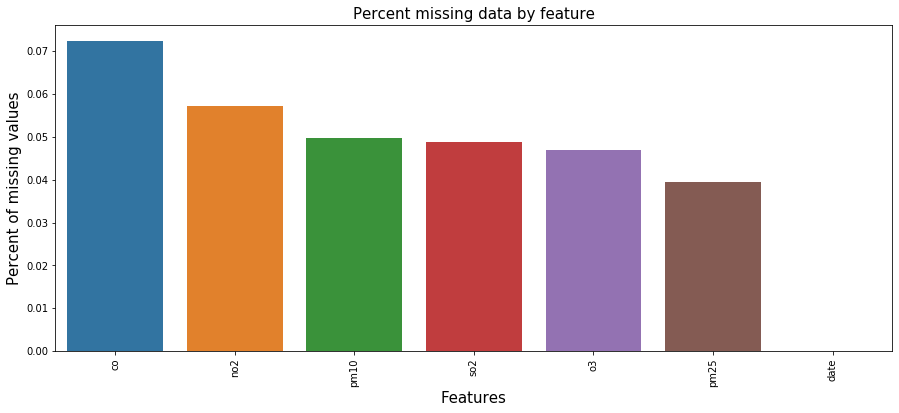

In [5]:
#Data Preprocessing
dataset=d1
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

#dataset=d1
#total = dataset.isnull().sum().sort_values(ascending=False)
#percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
#missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#f, ax = plt.subplots(figsize=(15, 6))
#plt.xticks(rotation='90')
#sns.barplot(x=missing_data.index, y=missing_data['Percent'])
#plt.xlabel('Features', fontsize=15)
#plt.ylabel('Percent of missing values', fontsize=15)
#plt.title('Percent missing data by feature', fontsize=15)
#missing_data.head()


In [6]:
rawdata=d1

In [7]:
for label,content in d1.items():
    if label != 'date':
        d1[label]=d1[label].fillna(d1[label].mean())
        
d1=d1.drop(['date'],axis=1)

In [8]:
features=list(d1.columns)
features

['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

# Assignment

In [9]:
X = d1[features]
y = d1['pm25']#Sequential Learning.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(1291, 6) (1291,)
(862, 6) (862,)


# Regression
Decision Tree Regression

In [11]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 282.211, test: 607.076
R^2 train: 0.969, test: 0.941


# Random forest Regression

In [12]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.822, test: 132.138
R^2 train: 1.000, test: 0.987


In [16]:
from sklearn.model_selection import KFold

def train_and_evaluate(clf, X_train, y_train):
    
    clf.fit(X_train, y_train)
    
    print ("Coefficient of determination on training set:",clf.score(X_train, y_train))
    
    # create a k-fold croos validation iterator of k=5 folds
    cv = KFold(5, shuffle=True, random_state=33)
    scores = cross_val_score(clf, X_train, y_train, cv=cv)
    print ("Average coefficient of determination using 5-fold crossvalidation:",np.mean(scores))

In [17]:
from sklearn import svm
clf_svr= svm.SVR(kernel='linear')
train_and_evaluate(clf_svr,X_train,y_train)

Coefficient of determination on training set: 0.9999996982478853
Average coefficient of determination using 5-fold crossvalidation: 0.9999996720130326


In [18]:
clf_svr_poly= svm.SVR(kernel='poly')
train_and_evaluate(clf_svr_poly,X_train,y_train)

Coefficient of determination on training set: 0.825175936028312
Average coefficient of determination using 5-fold crossvalidation: 0.820412303109259


In [19]:
clf_svr_rbf= svm.SVR(kernel='rbf')
train_and_evaluate(clf_svr_rbf,X_train,y_train)

Coefficient of determination on training set: 0.8343683934171898
Average coefficient of determination using 5-fold crossvalidation: 0.7602915841461029


In [20]:
clf_svr_poly2= svm.SVR(kernel='poly',degree=2)
train_and_evaluate(clf_svr_poly2,X_train,y_train)

Coefficient of determination on training set: 0.9396965218496407
Average coefficient of determination using 5-fold crossvalidation: 0.9351490012708789


In [13]:
###Lockdown  Data Visualization###

In [14]:
rawdata.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')

In [15]:
rawdata['date'] = pd.to_datetime(rawdata.date)
rawdata['date']=pd.to_datetime(rawdata['date'])
rawdata=rawdata.sort_values(by=['date'])
df21 = rawdata.loc[rawdata['date'] > '2020-03-24']
df21 = df21.sort_values(by = 'date')
df21.shape

(37, 7)

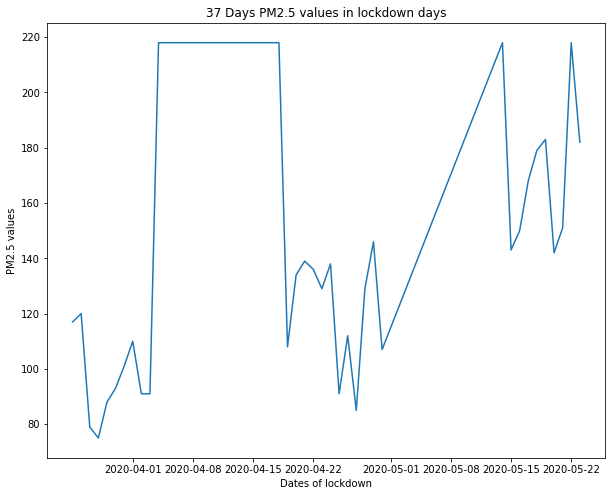

In [16]:
import matplotlib.pyplot as plt

dates = df21['date']
pm25 = df21['pm25']
pm25 = [int(i) for i in pm25]

plt.figure(figsize=(10,8))

length = len(dates)

plt.plot(dates,pm25)
plt.title('37 Days PM2.5 values in lockdown days')
plt.xlabel('Dates of lockdown')
plt.ylabel('PM2.5 values')

plt.show()

In [17]:
mask = (rawdata['date'] >= '2020-02-17') & (rawdata['date']  < '2020-03-25')

past21 = rawdata.loc[mask]
past21.shape

(37, 7)

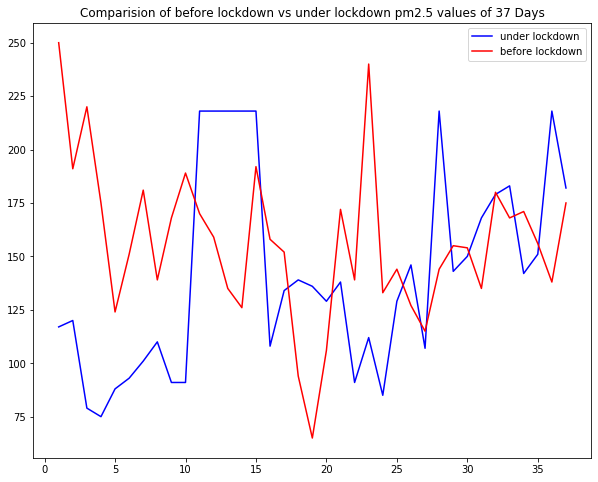

In [18]:
###plots for b4 and after lockdown
import matplotlib.pyplot as plt

dates = df21['date']
pm25_l = df21['pm25']
pm25_l = [int(i) for i in pm25]


pm25_n = past21['pm25']
pm25_n = [int(i) for i in pm25_n]

plt.figure(figsize=(10,8))

length = [i for i in range(1,len(dates)+1)]

plt.plot(length,pm25_l,color='blue',label='under lockdown')
plt.plot(length,pm25_n,color='red',label='before lockdown')
plt.legend()
plt.title('Comparision of before lockdown vs under lockdown pm2.5 values of 37 Days')
plt.show()